In [52]:
import sklearn

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Bank Loan Modelling Dataset

Source: https://www.kaggle.com/itsmesunil/bank-loan-modelling

1.ID - customer's ID

2.Age - customer's age in completed years

3.Experience - years of professional experience

4.Income - annual income of the customer ($000)

5.ZIP Code - home address zip code

6.Family - family size of the customers

7.CCAvg - avg. spending on credit cards per month ($000)

8.Education - Education level 1: Undergrad, 2:Graduate, 3:Advanced/Professional

9.Mortgage - Value of house mortgage if any ($000)

10.Personal Loan - Did this customer accept the personal loan offered in the last campaign?

11.Securities Account - Does the customer have a securities account with the bank?

12.CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

13.Online - Does the customer use internet banking facilities?

14.CreditCard - Does the customer use a credit card issued by UniversalBank?

In [53]:
bank_data = pd.read_csv('datasets/bank_data.csv')

bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [54]:
bank_data.shape

(480, 14)

In [55]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [56]:
bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)

In [57]:
bank_data.columns

Index(['Age', 'Income', 'Family', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [58]:
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [59]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 480 non-null    int64
 1   Income              480 non-null    int64
 2   Family              480 non-null    int64
 3   Education           480 non-null    int64
 4   Mortgage            480 non-null    int64
 5   Securities Account  480 non-null    int64
 6   CD Account          480 non-null    int64
 7   Online              480 non-null    int64
 8   CreditCard          480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


In [60]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [61]:
bank_data.apply(lambda x: len(x.unique()))

Age                    40
Income                102
Family                  4
Education               3
Mortgage              141
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [62]:
bank_data.to_csv('datasets/bank_data_processed.csv', index=False)

In [68]:
!dir datasets

 Volume in drive C is OS
 Volume Serial Number is 5080-813E

 Directory of C:\Users\anele.mbabela\PROJECTS_NASA\EMPLOYING ENSEBLE METHODS WITH SCIKIT-LEARN\datasets

2020/02/22  13:18    <DIR>          .
2020/02/22  13:18    <DIR>          ..
2020/02/22  13:18            19ÿ745 bank_data.csv
2020/05/31  20:16            10ÿ928 bank_data_processed.csv
2020/02/22  13:18            41ÿ431 concrete_data.csv
2020/02/22  13:18             6ÿ148 _DS_Store
               4 File(s)         78ÿ252 bytes
               2 Dir(s)  22ÿ794ÿ489ÿ856 bytes free


### Visualizing relationships

Text(0, 0.5, 'CreditCard')

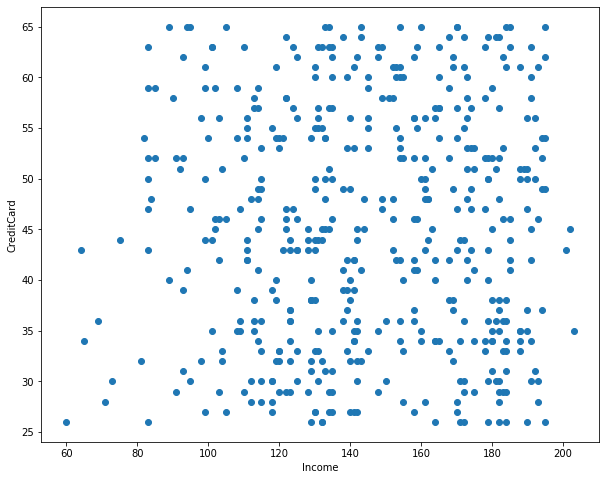

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter( bank_data['Income'], bank_data['Age'])

plt.xlabel('Income')
plt.ylabel('CreditCard')

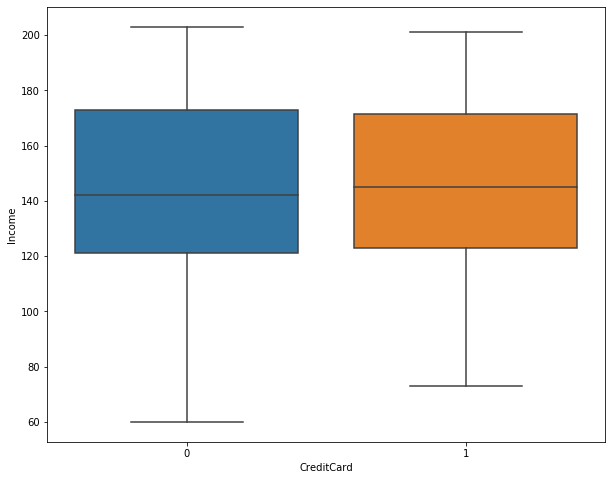

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(bank_data['CreditCard'], bank_data['Income'])

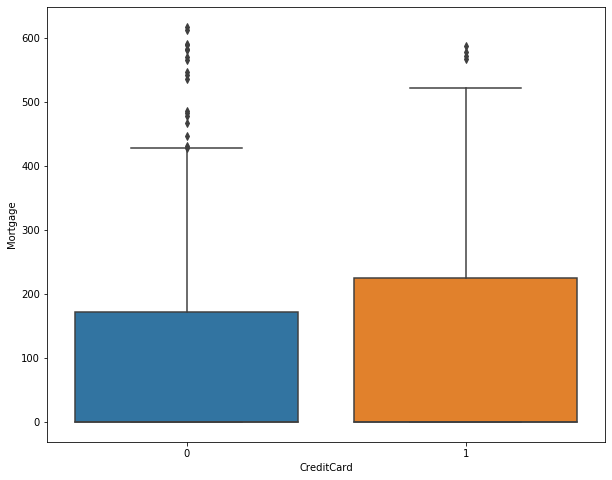

In [71]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(bank_data['CreditCard'], bank_data['Mortgage'])

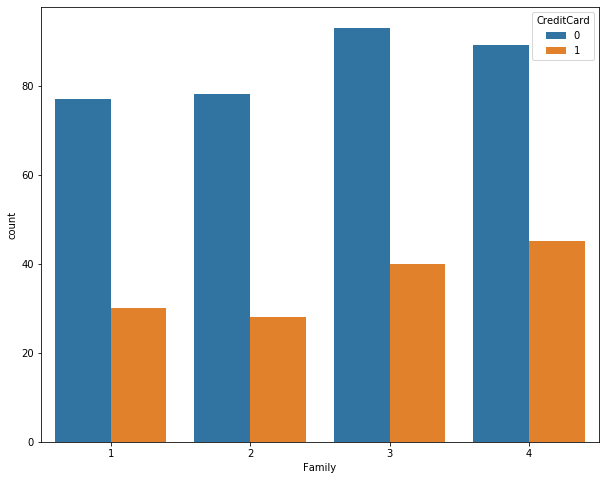

In [72]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Family', data = bank_data, hue = 'CreditCard')

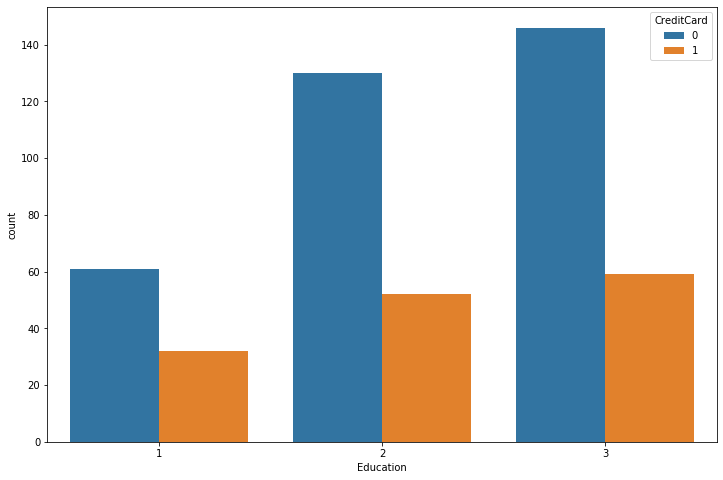

In [73]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Education', data = bank_data, hue='CreditCard')

In [74]:
pd.crosstab(bank_data['Securities Account'], bank_data['CreditCard'])

CreditCard,0,1
Securities Account,,
0,294,126
1,43,17


In [75]:
bank_data_corr = bank_data.corr()

bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.021260,-0.001712,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Income,0.021260,1.000000,-0.020876,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,-0.020876,1.000000,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
Education,-0.009196,0.122170,-0.239996,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.189672,0.070556,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.053058,-0.106005,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.069669,-0.003085,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.075136,-0.039178,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762
CreditCard,0.026542,0.013477,0.050746,-0.038536,0.039181,-0.012052,0.514046,-0.043762,1.000000


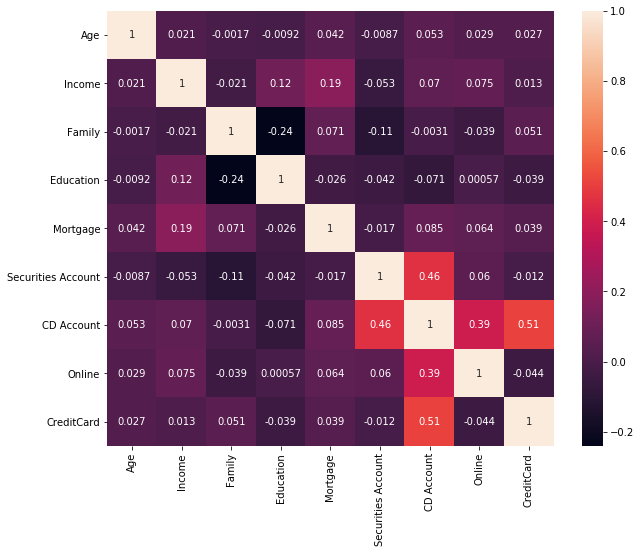

In [76]:
plt.figure(figsize=(10, 8))

sns.heatmap(bank_data_corr, annot=True)

In [77]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [78]:
X.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online
0,34,180,1,3,0,0,0,0
1,38,130,4,3,134,0,0,0
2,46,193,2,3,0,0,0,0
3,38,119,1,2,0,0,1,1
4,42,141,3,3,0,1,1,1


In [79]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: CreditCard, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
x_train.shape, y_train.shape

((384, 8), (384,))

In [82]:
x_test.shape, y_test.shape

((96, 8), (96,))

### Voting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [83]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
log_clf = LogisticRegression(C=1, solver='liblinear')

svc_clf = SVC(C=1, kernel='linear', gamma='auto')

naive_clf = GaussianNB()

In [85]:
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
SVC 0.8020833333333334
GaussianNB 0.78125


#### Hard voting
Hard voting classifier (voting='hard') aggregate the predictions of each classifier and predict the class that gets the most votes

In [90]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='hard')

In [91]:
voting_clf_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc',
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [92]:
voting_clf_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'svc': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'naive': GaussianNB(priors=None, var_smoothing=1e-09)}

In [93]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

In [94]:
y_pred = voting_clf_hard.predict(x_test)

In [95]:
accuracy_score(y_test, y_pred)

0.8125

#### Precision, Recall and F1-scores

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        68
           1       0.71      0.61      0.65        28

    accuracy                           0.81        96
   macro avg       0.78      0.75      0.76        96
weighted avg       0.81      0.81      0.81        96



#### Confusion Matrix

In [97]:
print(confusion_matrix(y_test, y_pred))

[[61  7]
 [11 17]]


In [98]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
SVC 0.8020833333333334
GaussianNB 0.78125
VotingClassifier 0.8125


### Soft voting requires probability scores

In [99]:
y_pred_probs = log_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.71248276, 0.28751724],
       [0.28554209, 0.71445791],
       [0.74766456, 0.25233544],
       [0.93958998, 0.06041002],
       [0.16144049, 0.83855951],
       [0.95775477, 0.04224523],
       [0.93824782, 0.06175218],
       [0.97004318, 0.02995682],
       [0.63815311, 0.36184689],
       [0.74945052, 0.25054948]])

In [100]:
y_pred_probs = naive_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.8549196 , 0.1450804 ],
       [0.15593157, 0.84406843],
       [0.85811397, 0.14188603],
       [0.89165961, 0.10834039],
       [0.11589827, 0.88410173],
       [0.90274843, 0.09725157],
       [0.8907855 , 0.1092145 ],
       [0.9171904 , 0.0828096 ],
       [0.86474978, 0.13525022],
       [0.20069051, 0.79930949]])

In [101]:
y_pred_probs = svc_clf.predict_proba(x_test)

AttributeError: predict_proba is not available when  probability=False

#### Soft voting
Soft voting classifier (voting='soft') predict the class with the highest class probability, averaged over all the individual classifiers. 

All of the above classifiers are by default enabled for probability estimates except SVC.    
So in SVC we have to pass one more parameter as probability=True

In [49]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [50]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf_soft), 
                                               ('naive', naive_clf)],
                                   voting='soft', 
                                   weights = [0.40, 0.30, 0.30])

In [51]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8125
SVC 0.8125
GaussianNB 0.8125
VotingClassifier 0.8125
